In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from scipy import interp

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Output/BC_train")
train_loss = df.loc[:,'BC_train_loss']
micro_result = df.loc[:,'BC_train_result_micro']
macro_result = df.loc[:,'BC_train_result_macro']
val_loss = df.loc[:,'BC_val_loss']
val_micro_result = df.loc[:,'BC_val_result_micro']
val_macro_result = df.loc[:,'BC_val_result_macro']

In [4]:
df2 = pd.read_csv("/content/drive/MyDrive/Output/Bottleneck_train")
train_loss2 = df2.loc[:,'train_loss']
micro_result2 = df2.loc[:,'train_result_micro']
macro_result2 = df2.loc[:,'train_result_macro']
val_loss2 = df2.loc[:,'val_loss']
val_micro_result2 = df2.loc[:,'val_result_micro']
val_macro_result2 = df2.loc[:,'val_result_macro']

In [5]:
df3 = pd.read_csv("/content/drive/MyDrive/Output/vgg_train")
train_loss3 = df3.loc[:,'train_loss']
micro_result3 = df3.loc[:,'train_result_micro']
macro_result3 = df3.loc[:,'train_result_macro']
val_loss3 = df3.loc[:,'val_loss']
val_micro_result3 = df3.loc[:,'val_result_micro']
val_macro_result3 = df3.loc[:,'val_result_macro']

In [6]:
df4 = pd.read_csv("/content/drive/MyDrive/Output/resnet_train")
train_loss4 = df4.loc[:,'train_loss']
micro_result4 = df4.loc[:,'train_result_micro']
macro_result4 = df4.loc[:,'train_result_macro']
val_loss4 = df4.loc[:,'val_loss']
val_micro_result4 = df4.loc[:,'val_result_micro']
val_macro_result4 = df4.loc[:,'val_result_macro']

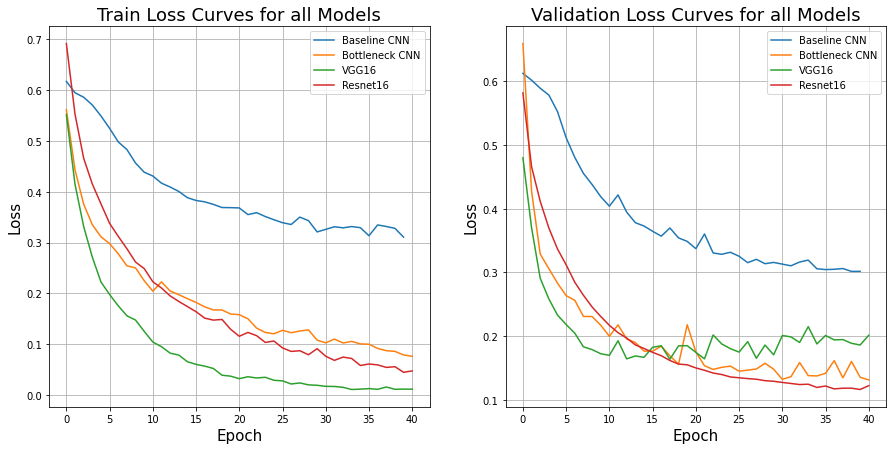

In [19]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(train_loss, label="Baseline CNN")
plt.plot(train_loss2,label="Bottleneck CNN")
plt.plot(train_loss3, label='VGG16')
plt.plot(train_loss4, label='Resnet16')
plt.legend()
plt.title("Train Loss Curves for all Models", fontsize=18)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid()

plt.subplot(1,2,2)
plt.plot(val_loss, label="Baseline CNN")
plt.plot(val_loss2,label="Bottleneck CNN")
plt.plot(val_loss3, label='VGG16')
plt.plot(val_loss4, label='Resnet16')
plt.legend()
plt.title("Validation Loss Curves for all Models", fontsize=18)
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid()


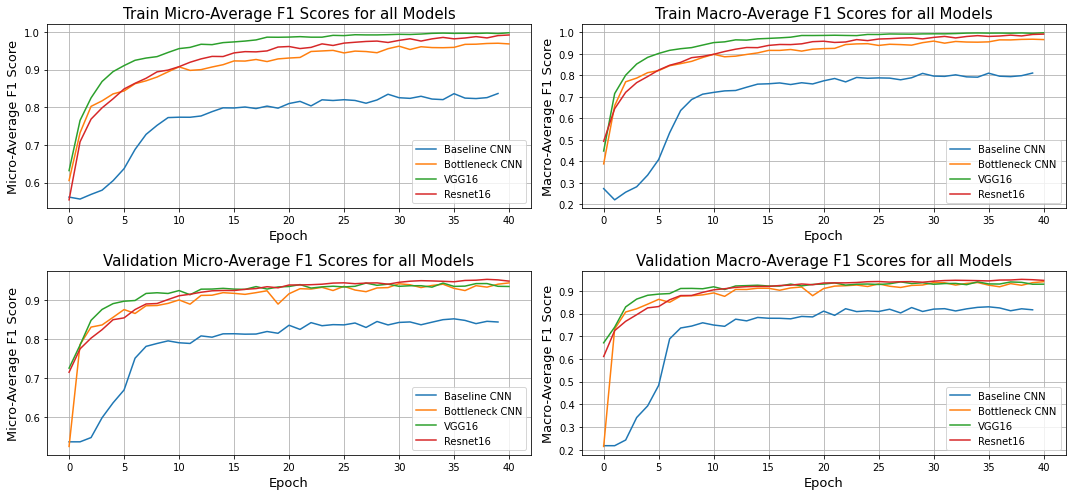

In [21]:
plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
plt.plot(micro_result, label="Baseline CNN")
plt.plot(micro_result2,label="Bottleneck CNN")
plt.plot(micro_result3, label='VGG16')
plt.plot(micro_result4, label='Resnet16')
plt.legend()
plt.title("Train Micro-Average F1 Scores for all Models", fontsize=15)
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Micro-Average F1 Score", fontsize=13)
plt.grid()

plt.subplot(2,2,2)
plt.plot(macro_result, label="Baseline CNN")
plt.plot(macro_result2,label="Bottleneck CNN")
plt.plot(macro_result3, label='VGG16')
plt.plot(macro_result4, label='Resnet16')
plt.legend()
plt.title("Train Macro-Average F1 Scores for all Models", fontsize=15)
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Macro-Average F1 Score", fontsize=13)
plt.grid()

plt.subplot(2,2,3)
plt.plot(val_micro_result, label="Baseline CNN")
plt.plot(val_micro_result2,label="Bottleneck CNN")
plt.plot(val_micro_result3, label='VGG16')
plt.plot(val_micro_result4, label='Resnet16')
plt.legend()
plt.title("Validation Micro-Average F1 Scores for all Models", fontsize=15)
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Micro-Average F1 Score", fontsize=13)
plt.grid()

plt.subplot(2,2,4)
plt.plot(val_macro_result, label="Baseline CNN")
plt.plot(val_macro_result2,label="Bottleneck CNN")
plt.plot(val_macro_result3, label='VGG16')
plt.plot(val_macro_result4, label='Resnet16')
plt.legend()
plt.title("Validation Macro-Average F1 Scores for all Models", fontsize=15)
plt.xlabel("Epoch", fontsize=13)
plt.ylabel("Macro-Average F1 Socre", fontsize=13)
plt.grid()
plt.tight_layout()

In [9]:
df = pd.read_csv("/content/drive/MyDrive/Output/BC_test")
columns = df.columns.values
test_label = df.loc[:,['label1', 'label2', 'label3', 'label4']].values
test_output = df.loc[:,['pred1', 'pred2', 'pred3', 'pred4']].values

In [10]:
df2 = pd.read_csv("/content/drive/MyDrive/Output/Bottleneck_test")
test_label2 = df2.loc[:,['label1', 'label2', 'label3', 'label4']].values
test_output2 = df2.loc[:,['pred1', 'pred2', 'pred3', 'pred4']].values

In [11]:
df3 = pd.read_csv("/content/drive/MyDrive/Output/vgg_test")
test_label3 = df3.loc[:,['label1', 'label2', 'label3', 'label4']].values
test_output3 = df3.loc[:,['pred1', 'pred2', 'pred3', 'pred4']].values

In [12]:
df4 = pd.read_csv("/content/drive/MyDrive/Output/resnet_test")
test_label4 = df4.loc[:,['label1', 'label2', 'label3', 'label4']].values
test_output4 = df4.loc[:,['pred1', 'pred2', 'pred3', 'pred4']].values

In [13]:
def AUC_metric(label, pred):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  test_label = np.asarray(label)
  test_ouput = np.asarray(pred)

  for idx in range(4):
      fpr[idx], tpr[idx], _ = roc_curve(test_label[:, idx], test_ouput[:, idx])
      roc_auc[idx] = auc(fpr[idx], tpr[idx])

  fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), test_ouput.ravel())
  print(fpr)
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

  mean_tpr = np.zeros_like(all_fpr)
  for i in range(4):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  mean_tpr /= 4

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  return (fpr, tpr, roc_auc)

In [14]:
fpr, tpr, roc_auc = AUC_metric(test_label,test_output)
fpr2, tpr2, roc_auc2 = AUC_metric(test_label2,test_output2)
fpr3, tpr3, roc_auc3 = AUC_metric(test_label3,test_output3)
fpr4, tpr4, roc_auc4 = AUC_metric(test_label4,test_output4)

{0: array([0.        , 0.08695652, 1.        ]), 1: array([0.        , 0.01342282, 1.        ]), 2: array([0.        , 0.17592593, 1.        ]), 3: array([0.        , 0.08296943, 1.        ]), 'micro': array([0.        , 0.08263473, 1.        ])}
{0: array([0.        , 0.03614458, 1.        ]), 1: array([0., 0., 1.]), 2: array([0.        , 0.12727273, 1.        ]), 3: array([0.        , 0.07048458, 1.        ]), 'micro': array([0.        , 0.05615293, 1.        ])}
{0: array([0., 0., 1.]), 1: array([0.        , 0.00677966, 1.        ]), 2: array([0.        , 0.12162162, 1.        ]), 3: array([0.        , 0.03571429, 1.        ]), 'micro': array([0.        , 0.04425837, 1.        ])}
{0: array([0.        , 0.02325581, 1.        ]), 1: array([0., 0., 1.]), 2: array([0.        , 0.10504202, 1.        ]), 3: array([0.       , 0.0521327, 1.       ]), 'micro': array([0.        , 0.04529201, 1.        ])}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


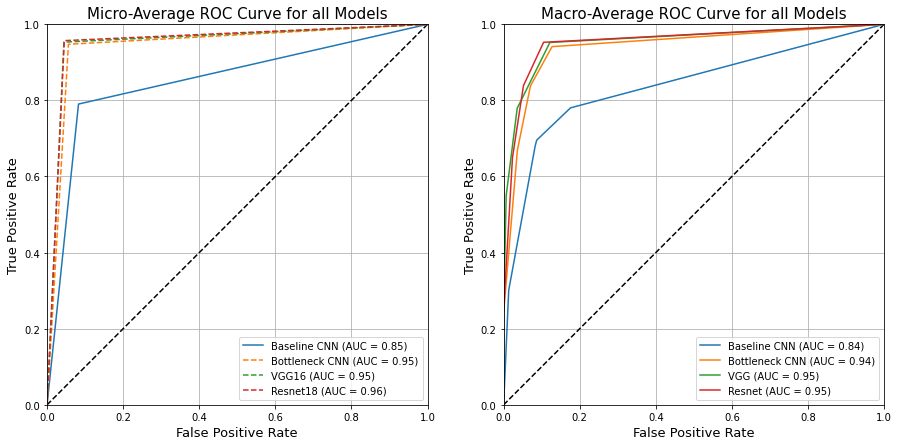

In [20]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
x = np.linspace(0,1)
y = x
plt.plot(x,y,linestyle="dashed",color='black')
plt.plot(fpr["micro"], tpr["micro"],label='Baseline CNN (AUC = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot(fpr2["micro"], tpr2["micro"],linestyle="dashed",label='Bottleneck CNN (AUC = {0:0.2f})'.format(roc_auc2["micro"]))
plt.plot(fpr3["micro"], tpr3["micro"],linestyle="dashed",label='VGG16 (AUC = {0:0.2f})'.format(roc_auc3["micro"]))
plt.plot(fpr4["micro"], tpr4["micro"],linestyle="dashed",label='Resnet18 (AUC = {0:0.2f})'.format(roc_auc4["micro"]))
plt.title("Micro-Average ROC Curve for all Models", fontsize=15)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate", fontsize=13)
plt.ylabel("True Positive Rate", fontsize=13)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(x,y,linestyle="dashed",color='black')
plt.plot(fpr["macro"], tpr["macro"],
         label='Baseline CNN (AUC = {0:0.2f})'.format(roc_auc["macro"]))
plt.plot(fpr2["macro"], tpr2["macro"],
         label='Bottleneck CNN (AUC = {0:0.2f})'.format(roc_auc2["macro"]))
plt.plot(fpr3["macro"], tpr3["macro"],
         label='VGG (AUC = {0:0.2f})'.format(roc_auc3["macro"]))
plt.plot(fpr4["macro"], tpr4["macro"],
         label='Resnet (AUC = {0:0.2f})'.format(roc_auc4["macro"]))
plt.title("Macro-Average ROC Curve for all Models", fontsize=15)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate", fontsize=13)
plt.ylabel("True Positive Rate", fontsize=13)
plt.legend()
plt.grid()